## Exercise 10

In [26]:
# Import packages
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
import matplotlib.pyplot as plt

# Solve for the steady-state in 3-per OG model

# Import libraries
import numpy as np
import scipy.optimize as opt

# Household paramters
yrs_live = 60
S=3
nvec = np.array([1.0,1.0,0.2]) #labor schedule for the households
L = nvec.sum() #total household labor
beta_annual = 0.96
beta = beta_annual**(yrs_live/S)
sigma = 3.0 #coefficient fo relative risk aversion in the utility function

# Firms' parameters
alpha = 0.35
A = 1.0
delta_annual = 0.05 #depreciation rate
delta = 1-(1-delta_annual)**(yrs_live/ S)

#Helper functions for definition

def get_K(kvec):
    K = kvec.sum()
    return K

def get_r(K, L, *params):
    A, alpha, delta, z = params
    r = np.exp(z)*alpha*A*((L/K)**(1-alpha)) - delta
    return r

def get_w(K, L, *params):
    A, alpha, delta, z = params
    w = np.exp(z)*(1-alpha)*A*((K/L)**(alpha))
    return w


In [27]:
def Model_dynOLG(theta0, params):
    
    #Theta0
    (k2pp, k3pp, k2p, k3p, k2, k3, zp, z) = theta0
    
    Kpp = get_K(np.array([k2pp, k3pp]))
    Kp = get_K(np.array([k2p, k3p]))
    K = get_K(np.array([k2, k3]))
    L = nvec.sum()
    
    r = get_r(K, L, A, alpha, delta, z)
    rp = get_r(Kp, L, A, alpha, delta, zp)
    w = get_w(K, L, A, alpha, delta, z)
    wp = get_w(Kp, L, A, alpha, delta, zp)
    
    MUc1 = (w*nvec[0] - k2p)**(-sigma)
    MUc2 = ((1+r)*(k2) + w*nvec[1] - k3p)**(-sigma)
    MUc2p = ((1+rp)*(k2p) + wp*nvec[1] - k3pp)**(-sigma)
    MUc3p = ((1+rp)*(k3p) + nvec[2]*wp)**(-sigma)
    error1 = MUc1 - beta*(1+rp)*MUc2p
    error2 = MUc2 - beta*(1+rp)*MUc3p
    errors = np.array([error1, error2])
    return errors

In [28]:
params = (nvec, beta, sigma, alpha, A, delta)

nx = 2
ny = 0
nz = 1
zbar = np.array([0])

k_init = np.array([0.01, 0.06])
k2bar, k3bar = LinApp_FindSS(Model_dynOLG, params, k_init, zbar, nx, ny)
print ('k2bar: ', k2bar)
print ('k3bar: ', k3bar)

# set up steady state input vector
theta0 = np.array([k2bar, k3bar, k2bar, k3bar, k2bar, k3bar, 0., 0.])

# check SS solution
check = Model_dynOLG(theta0, params)
print ('check: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')

k2bar:  0.019312735239
k3bar:  0.0584115908789
check:  [ -1.05575282e-09   4.92647700e-10]


In [29]:
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, WW, TT] = \
    LinApp_Deriv(Model_dynOLG, params, theta0, nx, ny, nz, logX = True)
print('FF: ', FF)
print('GG: ', GG)
print('HH: ', HH)
print('LL: ', LL)
print('MM: ', MM)

NN = 1

PP, QQ, UU, RR, SS, VV = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,WW,TT,NN,zbar,Sylv=0)
print ('PP:',PP)
print ('QQ', QQ)

FF:  [[   0.         -137.73170542]
 [   0.            0.        ]]
GG:  [[ 251.2488888   128.79694697]
 [ -18.77371405  305.15657866]]
HH:  [[ -47.53544326 -143.77149738]
 [-115.38666173  -37.37975927]]
LL:  [[ 468.11869862]
 [ 200.17332552]]
MM:  [[-546.59124782]
 [-405.73709328]]
PP: [[ 0.03530577  0.63635012]
 [ 0.38029487  0.16164297]]
QQ [[ 0.50514453]
 [ 0.70471103]]


/Users/Geoff/anaconda/lib/python3.5/site-packages/scipy/linalg/decomp.py:60: RuntimeWarning: divide by zero encountered in true_divide
  w = (alphar + _I * alphai) / beta
/Users/Geoff/anaconda/lib/python3.5/site-packages/scipy/linalg/decomp.py:60: RuntimeWarning: invalid value encountered in true_divide
  w = (alphar + _I * alphai) / beta


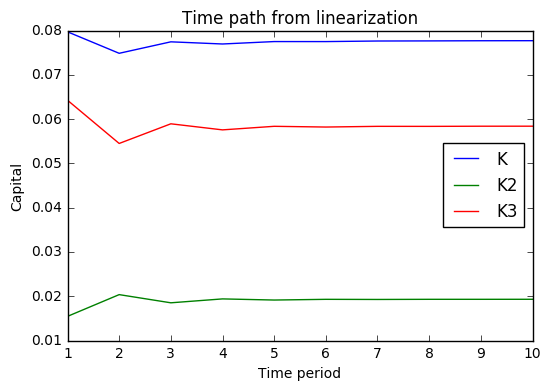

In [40]:
k2_init = 0.8*k2bar
k3_init = 1.1*k3bar
k_ss = np.array([k2bar, k3bar])
k_ss = np.reshape(k_ss, (2,1))

k_star = np.zeros((2, 10))
k_star[0,0] = np.log(0.8*k2bar)-np.log(k2bar)
k_star[1,0] = np.log(1.1*k3bar)-np.log(k3bar)

for i in range(1, 10):
    k_star[:,i] = np.dot(PP, k_star[:,i-1])
k = k_ss*np.exp(k_star)
k_total = np.sum(k, axis = 0)

x = np.linspace(1,10, 10)

plt.plot(x, k_total, label = "K")
plt.plot(x, k[0,:], label = "K2")
plt.plot(x, k[1,:], label = "K3")
plt.legend(loc = "center right")
plt.title("Time path from linearization")
plt.xlabel("Time period")
plt.ylabel("Capital")
plt.show()

We note that this gives essentially the same output as the solver from the OLG chapter, and this runs significantly faster (in less than a second).

## Exercise 11

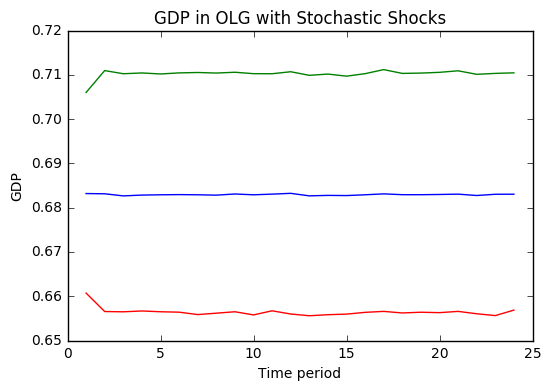

In [66]:
rho_z = 0.9**20
sigma_z = 0.02

#Generation random error terms and then calculate the z values
eps = np.random.normal(0, scale=sigma_z, size=(10000, 25))
z = np.zeros_like(eps)
z[:,0] = np.zeros(10000)
for i in range(1,10001):
    z[i-1,0] = 0
    for j in range(1, 25):
        z[i-1,j-1] = rho_z*z[i-1, j-2] + eps[i-1,j-1]
        
k2_init = 0.8*k2bar
k3_init = 1.1*k3bar
k_ss = np.array([k2bar, k3bar])


k2 = np.zeros_like(eps)
k3 = np.zeros_like(eps)
k = np.zeros_like(eps)
y = np.zeros_like(eps)
c = np.zeros_like(eps)
I = np.zeros_like(eps)

for i in range(1, 25):
    k2[:, i] = PP[0, 0] * k2[:, i-1] + PP[0, 1] * k3[:, i-1] + QQ[0] * z[:, i]
    k3[:, i] = PP[1, 0] * k2[:, i-1] + PP[1, 1] * k3[:, i-1] + QQ[0] * z[:, i]
k2 = k2bar * np.exp(k2)
k3 = k3bar * np.exp(k3)
k = k2 + k3

L = 2.2

w = get_w(k, L, A, alpha, delta, z)
r = get_r(k, L, A, alpha, delta, z)


#Plot the graph for output

for i in range(25):
    y[:,i] = (k[:,i]**alpha)*L**(1-alpha)*np.exp(z[:,i])
    
ymean = y.mean(axis=0)
y95 = np.percentile(y, 95, axis = 0)
y5 = np.percentile(y, 5, axis = 0)

ymean = ymean[0:24]
y95 = y95[0:24]
y5 = y5[0:24]

x = np.linspace(1,24,24)
plt.plot(x, ymean, label="Mean")
plt.plot(x, y95, label="95p")
plt.plot(x, y5, label='5p')
plt.xlabel("Time period")
plt.ylabel("GDP")
plt.title("GDP in OLG with Stochastic Shocks")
plt.show()

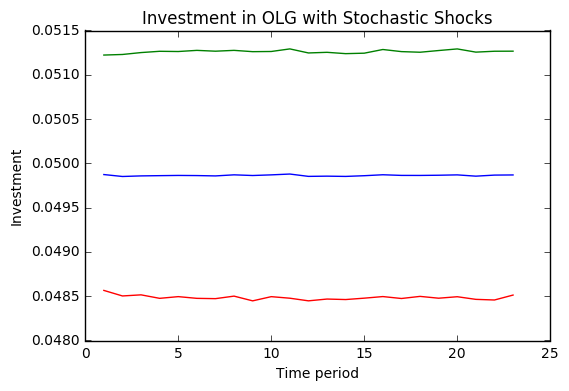

In [70]:
# Plot the graph for investment

for i in range(24):
    I[:,i] = k[:,i+1] - (1-delta)*k[:,i]
    
Imean = I.mean(axis=0)
I95 = np.percentile(I, 95, axis = 0)
I5 = np.percentile(I, 5, axis = 0)

Imean = Imean[0:23]
I95 = I95[0:23]
I5 = I5[0:23]

x = np.linspace(1,23,23)
plt.plot(x, Imean, label="Mean")
plt.plot(x, I95, label="95p")
plt.plot(x, I5, label='5p')
plt.xlabel("Time period")
plt.ylabel("Investment")
plt.title("Investment in OLG with Stochastic Shocks")
plt.show()

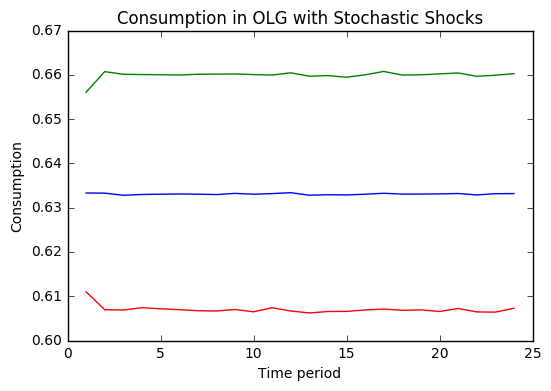

In [72]:
# Plot the graph for consumption

for i in range(24):
    c[:,i] = y[:,i] - I[:,i]
    
cmean = c.mean(axis=0)
c95 = np.percentile(c, 95, axis = 0)
c5 = np.percentile(c, 5, axis = 0)

cmean = cmean[0:24]
c95 = c95[0:24]
c5 = c5[0:24]

x = np.linspace(1,24,24)
plt.plot(x, cmean, label="Mean")
plt.plot(x, c95, label="95p")
plt.plot(x, c5, label='5p')
plt.xlabel("Time period")
plt.ylabel("Consumption")
plt.title("Consumption in OLG with Stochastic Shocks")
plt.show()